# Pandas module

Pandas library contains efficient data structures and data analysis tools. The main data structure is a `DataFrame` object, which can be interpreted as a two-dimensional table (similar to a spreadsheet containing column names and row labels).

In [1]:
import pandas as pd

## Series objects

The `pandas` module contains the following data structures:
* `Series` - one-dimensional array, similar to column in a spreadsheet.
*  `DataFrame` - two-dimensional array, similar to a spreadsheet.
* `Panel` - can be interpreted as dictionary of `DataFrame` objects (they are less commonly used). 

#### Series object initialization

In [2]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

#### Similarities to 1D `ndarray`

`Series` objects behave similarly to the one-dimensional `ndarray` arrays of the NumPy module - in addition, we can often pass them as parameters to NumPy functions.

In [3]:
import numpy as np

np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

It is also possible to perform arithmetic operations on `Series` objects - they are carried out *element-wise*, similar to operations on `ndarray` objects.

In [4]:
s + [10, 20, 30 ,40]

0    12
1    19
2    33
3    45
dtype: int64

Similarly to `ndarray` tables, we can add a single number to a `Series` object - it is added to all elements of the `Series` object. This process is called *broadcasting*.

In [5]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same also applies to all binary operations, such as `*` pr `/`, and even conditional statements.

In [6]:
s < 3

0     True
1     True
2    False
3    False
dtype: bool

## Index labels

Each `Series` element has a unique identifier called *index label*. By default, it simply specifies the rank of the element in the `Series` (starting with the value `0`), but it can also be manually specified.

In [7]:
s2 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s2

a    1
b    2
c    3
d    4
e    5
dtype: int64

`Series` object can also be used like a `dict`.

In [8]:
s2['b']

np.int64(2)

In [9]:
s2[1]

C:\Users\Adam\AppData\Local\Temp\ipykernel_14864\691718004.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s2[1]


np.int64(2)

In [10]:
s2.iloc[1]  # iloc for index

np.int64(2)

In [11]:
s2.loc['b']  # loc for label

np.int64(2)

Splitting a `Series` object also splits the index labels.

In [12]:
s2.iloc[1:3]

b    2
c    3
dtype: int64

This can lead to unexpected results when using the default numeric labels.

In [13]:
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [14]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

The first element has an index label of `2`. We are missing an element with an index label of `0`.

In [15]:
try:
    surprise_slice[0]
except KeyError as e:
    print("Key error:", e)

Key error: 0


Elements always can be accessed using the `iloc` attribute. This is another reason why it is always better to use the `loc` and `iloc` attributes to access `Series` objects.

In [16]:
surprise_slice.iloc[0]

np.int64(1002)

## Initialization with `dict` object

`Series` object can be created from `dict` object. Keys will be transformed into index labels.

In [17]:
weights = {'Alice': 54, 'Bob': 60, 'Carol': 78}
s3 = pd.Series(weights)
s3

Alice    54
Bob      60
Carol    78
dtype: int64

The appending of elements to the `Series` object can be controlled, as well as the order in which they appear, by explicitly defining the `index` parameter.

In [18]:
s4 = pd.Series(weights, index=['Bob', 'Alice'])
s4

Bob      60
Alice    54
dtype: int64

## Automatic arrangement

When multiple 'Series' objects are used in a given operation, the `pandas` module automatically arranges their elements by matching their index labels. 

In [19]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
Index(['Alice', 'Bob', 'Carol'], dtype='object')


Alice   NaN
Bob     NaN
Carol   NaN
a       NaN
b       NaN
c       NaN
d       NaN
e       NaN
dtype: float64

In [20]:
s5 = pd.Series([1000, 1000, 1000, 1000])
print("s2 =", s2.values)
print("s5 =", s5.values)

s2 + s5

s2 = [1 2 3 4 5]
s5 = [1000 1000 1000 1000]


a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
0   NaN
1   NaN
2   NaN
3   NaN
dtype: float64

The pandas module was unable to bind the `Series` objects because their labels do not match at all, hence the result filled with `NaN` values.

## Initialization with a scalar value

`Series` object can also be initialized with a scalar value and a list of index labels: all elements will be assigned this scalar.

In [21]:
meaning = pd.Series(42, ['life', 'universe', 'everything'])
meaning

life          42
universe      42
everything    42
dtype: int64

## Name of the `Series` object

In [22]:
s6 = pd.Series([83, 68], index=['bob', 'alice'], name='weights')
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plot a `Series` object

The Pandas module allows to plot a `Series` data using the matplotlib library.

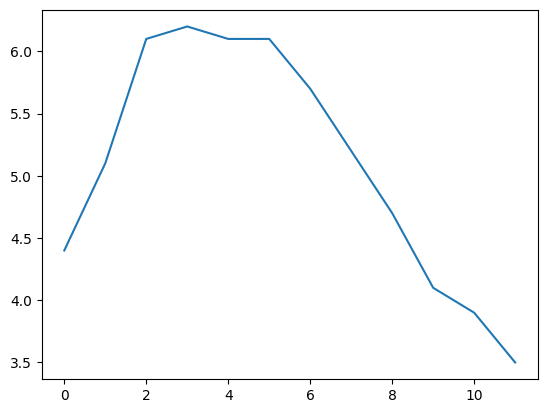

In [23]:
import matplotlib.pyplot as plt

temperatures = [4.4, 5.1, 6.1, 6.2, 6.1, 6.1, 5.7, 5.2, 4.7, 4.1, 3.9, 3.5]
s7 = pd.Series(temperatures, name='temperature')

s7.plot()
plt.show()

# Handling time data

Many data sets contain timestamps, and the pandas module does a great job of handling them:
* can represent periods (such as quarters) and frequencies (such as "monthly"),
* can convert periods to actual timestamps and back,
* can resample data and aggregate values in any way,
* supports time zone functionality.

## Time ranges

The following `pd.date_range()` function returns a `DatetimeIndex` object containing one DateTime value every hour for 12 hours, starting at 17:30 on January 20, 2020.

In [24]:
dates = pd.date_range('2020/01/20 5:30pm', periods=12, freq='h')
dates

DatetimeIndex(['2020-01-20 17:30:00', '2020-01-20 18:30:00',
               '2020-01-20 19:30:00', '2020-01-20 20:30:00',
               '2020-01-20 21:30:00', '2020-01-20 22:30:00',
               '2020-01-20 23:30:00', '2020-01-21 00:30:00',
               '2020-01-21 01:30:00', '2020-01-21 02:30:00',
               '2020-01-21 03:30:00', '2020-01-21 04:30:00'],
              dtype='datetime64[ns]', freq='h')

This `DatetimeIndex` object can be used as index in a `Series` object.

In [25]:
temp_series = pd.Series(temperatures, dates)
temp_series

2020-01-20 17:30:00    4.4
2020-01-20 18:30:00    5.1
2020-01-20 19:30:00    6.1
2020-01-20 20:30:00    6.2
2020-01-20 21:30:00    6.1
2020-01-20 22:30:00    6.1
2020-01-20 23:30:00    5.7
2020-01-21 00:30:00    5.2
2020-01-21 01:30:00    4.7
2020-01-21 02:30:00    4.1
2020-01-21 03:30:00    3.9
2020-01-21 04:30:00    3.5
Freq: h, dtype: float64

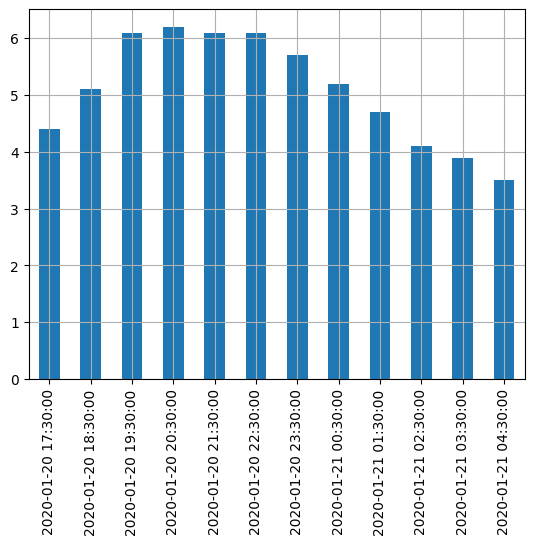

In [26]:
temp_series.plot(kind='bar')

plt.grid(True)
plt.show()

## Resampling

Pandas module allows to resample a time series in easy way.

In [27]:
temp_series_freq_2h = temp_series.resample('2h')
temp_series_freq_2h

The resampling operation is actually delayed, which is why a `Series` object is not returned, but a `DatetimeIndexResampler`. To perform the actual resampling operation, there is need to call the `mean()` method: the Pandas module will calculate the average of each pair of consecutive hours.

In [28]:
temp_series_freq_2h = temp_series_freq_2h.mean()

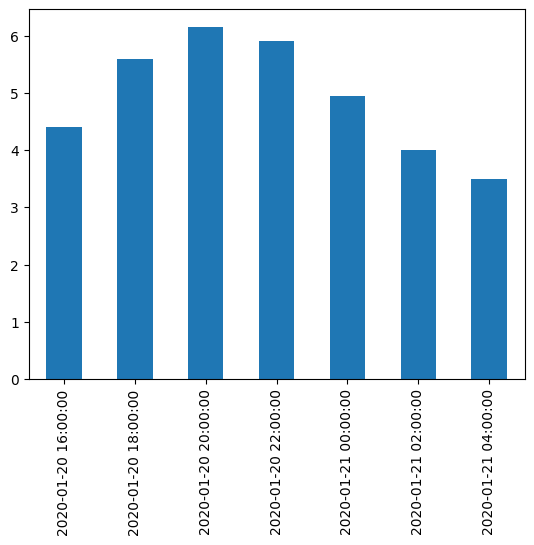

In [29]:
temp_series_freq_2h.plot(kind='bar')
plt.show()

The values have been automatically aggregated into two-hour periods. For example, at 6:30 p.m. the value was `5.1`, and at 7:30 p.m. it was `6.1`. After resampling, one value is obtained - `5.6`, which is the average of `5.1` and `6.1`. Instead of calculating the average, there is possibility to use any other aggregate function; for example, to leave the minimum value from each period.

In [30]:
temp_series_freq_2H = temp_series.resample('2h').min()
temp_series_freq_2H

2020-01-20 16:00:00    4.4
2020-01-20 18:00:00    5.1
2020-01-20 20:00:00    6.1
2020-01-20 22:00:00    5.7
2020-01-21 00:00:00    4.7
2020-01-21 02:00:00    3.9
2020-01-21 04:00:00    3.5
Freq: 2h, dtype: float64

The same thing can be achieved using the `apply()` method.

In [31]:
temp_series_freq_2h = temp_series.resample('2h').apply('min')
temp_series_freq_2h

2020-01-20 16:00:00    4.4
2020-01-20 18:00:00    5.1
2020-01-20 20:00:00    6.1
2020-01-20 22:00:00    5.7
2020-01-21 00:00:00    4.7
2020-01-21 02:00:00    3.9
2020-01-21 04:00:00    3.5
Freq: 2h, dtype: float64

## Increasing the sample rate and interpolation

This was an example of decreasing the sample rate. We can also increase the sample rate, but then appears "holes" in the data.

In [32]:
temp_series_freq_15min = temp_series.resample('15min').interpolate(method='cubic')
temp_series_freq_15min.head(15)

2020-01-20 17:30:00    4.400000
2020-01-20 17:45:00    4.452911
2020-01-20 18:00:00    4.605113
2020-01-20 18:15:00    4.829758
2020-01-20 18:30:00    5.100000
2020-01-20 18:45:00    5.388992
2020-01-20 19:00:00    5.669887
2020-01-20 19:15:00    5.915839
2020-01-20 19:30:00    6.100000
2020-01-20 19:45:00    6.203621
2020-01-20 20:00:00    6.240339
2020-01-20 20:15:00    6.231887
2020-01-20 20:30:00    6.200000
2020-01-20 20:45:00    6.163711
2020-01-20 21:00:00    6.131257
Freq: 15min, dtype: float64

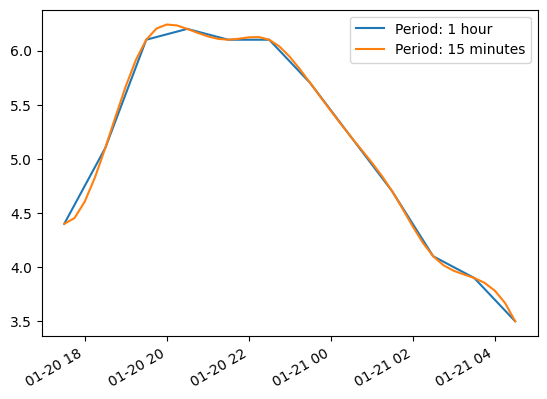

In [33]:
temp_series.plot(label='Period: 1 hour')
temp_series_freq_15min.plot(label='Period: 15 minutes')
plt.legend()
plt.show()

## Time zones

Time zones are *naive* by default: the pandas module doesn't know what the time zone is, so the date 2016-10-30 02:30 could mean 2:30 on October 30, 2016, in both Paris and New York. Time zone *awareness* can be enabled using the `tz_localize()` method.

In [34]:
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='h')
temp_series = pd.Series(temperatures, dates)

In [35]:
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

There is a `-04:00` part for all time elements. This means that they refer to UTC - 4 hours.

In [36]:
temp_series_paris = temp_series_ny.tz_convert('Europe/Paris')
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

The time offset has been changed from `+02:00` to `+01:00`: this is because France switches to winter time that day at 3 am (time is set back to 2 am). Time 2:30 appears twice.

In [37]:
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

Now the time `02:30` is really confusing.

In [38]:
try:
    temp_series_paris_naive.tz_localize('Europe/Paris')
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


With the `ambiguous` argument, the pandas module infer the correct daylight saving time based on the order of these ambiguous timestamps:

In [39]:
temp_series_paris_naive.tz_localize('Europe/Paris', ambiguous='infer')

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

## Periods
The `pd.period_range()` function returns a `PeriodIndex` object instead of a `DatetimeIndex` object. For example, all quarters in the years 2016 and 2017:

In [40]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

Adding the number `N` to the `PeriodIndex` object shifts the periods by `N` times the frequency of the `PeriodIndex` object.

In [41]:
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

The `asfreq()` method allows to change the frequency of a `PeriodIndex` object. All periods are extended or shortened accordingly.

In [42]:
quarters.asfreq('M')

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]')

By default, the `asfreq` method focuses on the end of each period. This behavior can be changed, so it will focus on the beginning of each period.

In [43]:
quarters.asfreq('M', how='start')

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]')

The zoom out.

In [44]:
quarters.asfreq("Y")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[Y-DEC]')

`Series` object containing `PeriodIndex` can be created.

In [45]:
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index=quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

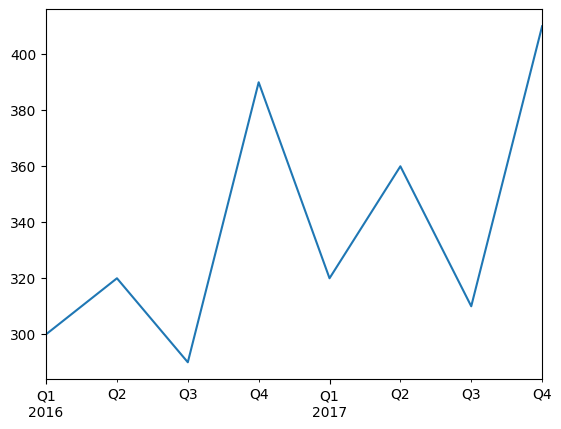

In [46]:
quarterly_revenue.plot(kind='line')
plt.show()

Periods can be converted to timestamps by calling the `to_timestamp` method. By default, this will give the first day of each period, but using the `how` and `freq` attributes, this can be changed to get the last hour of each period.

In [47]:
last_hours = quarterly_revenue.to_timestamp(how='end', freq='h')
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
dtype: int64

In [48]:
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

Displaying the last working day in each month of 2016 (for 9 a.m.).

In [49]:
months_2016 = pd.period_range('2016',  periods=12, freq='M')
one_day_after_last_days = months_2016.asfreq('D') + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period('h') + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[h]')

## `DataFrame` objects
A DataFrame object represents a spreadsheet containing cell values, column names, and row index labels. Expressions that calculate column values from other columns, create shift tables, group rows, draw charts, etc. can be defined . `DataFrame` objects can be considered as dictionaries of `Series` objects.

DataFrame object can be created by passing a dictionary of `Series` objects.

In [50]:
people_dict = {
    'weight': pd.Series([68, 83, 112], index=['alice', 'bob', 'carol']),
    'date of birth': pd.Series([1984, 1985, 1992], index=['bob', 'alice', 'carol'], name='year'),
    'kids': pd.Series([0, 3], index=['carol', 'bob']),
    'interests': pd.Series(['Bikes', 'Dancing'], index=['alice', 'bob']),
}

people = pd.DataFrame(people_dict)
people

,weight,date of birth,kids,interests
alice,68,1985,NaN,Bikes
bob,83,1984,3.0,Dancing
carol,112,1992,0.0,NaN


Some things to note:
* `Series` objects have been automatically assigned based on their indexes,
* missing data is marked with `NaN`,
* `Series` names are ignored (the name `"year"` is omitted).

The way to access the columns is pretty easy, they are returned as `Series` objects.

In [51]:
people['date of birth']

alice    1985
bob      1984
carol    1992
Name: date of birth, dtype: int64

Many columns at once.

In [53]:
people[['interests', 'date of birth']]

,interests,date of birth
alice,Bikes,1985
bob,Dancing,1984
carol,NaN,1992


If list of columns and/or row index labels are passed to the `DataFrame` constructor, only those columns and/or rows will exist in that order.

In [55]:
d2 = pd.DataFrame(people_dict,
                  columns=['date of birth', 'weight', 'height'],
                  index=['bob', 'alice', 'eugene']
    )
d2

,date of birth,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another  way to create a `DataFrame` object is to pass all values to the constructor as an `ndarray` array (or list of lists), and then specify the column names and row index labels separately:

In [56]:
values = [
            [1985, np.nan, 'Bikes',   68],
            [1984, 3,      'Dancing', 83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
    values,
    columns=['date of birth', 'kids', 'interests', 'weight'],
    index=['alice', 'bob', 'carol']
)
d3

,date of birth,kids,interests,weight
alice,1985,NaN,Bikes,68
bob,1984,3.0,Dancing,83
carol,1992,0.0,NaN,112


To determine missing values, the `np.nan` method or the hidden array of the NumPy module can be used.

In [61]:
masked_array = np.ma.asanyarray(values, dtype=np.object_)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
    masked_array,
    columns=['date of birth', 'kids', 'interests', 'weight'],
    index=['alice', 'bob', 'carol']
)
d3

,date of birth,kids,interests,weight
alice,1985,NaN,Bikes,68
bob,1984,3,Dancing,83
carol,1992,0,NaN,112


Instead of `ndarray` the `DataFrame` object can be passed.

In [62]:
d4 = pd.DataFrame(
         d3,
         columns=['interests', 'kids'],
         index=['alice', 'bob']
     )
d4

,interests,kids
alice,Bikes,NaN
bob,Dancing,3


It is also possible to create a `DataFrame` object with a dictionary (or list) of dictionaries (or list).

In [63]:
people = pd.DataFrame({
    'date of birth': {'alice': 1985, 'bob': 1984, 'carol': 1992},
    'interests': {'alice': 'Bikes', 'bob': 'Dancing'},
    'weight': {'alice': 68, 'bob': 83, 'carol': 112},
    'kids': {'bob': 3, 'carol': 0}
})
people

,date of birth,interests,weight,kids
alice,1985,Bikes,68,NaN
bob,1984,Dancing,83,3.0
carol,1992,NaN,112,0.0


## Multi-indexing

If all columns are tuples of the same size, then they are considered as multi-indexed. The same applies to row index labels.

In [73]:
d5 = pd.DataFrame(
    {
        ('public', 'birth year'): 
            {('Paris', 'alice'): 1985, ('Paris', 'bob'): 1984, ('London', 'carol'): 1992},
        ('public', 'interests'): 
            {('Paris', 'alice'): 'Bicycles', ('Paris', 'bob'): 'Dance'},
        ('private', 'weight'): 
            {('Paris', 'alice'): 68, ('Paris', 'bob'): 83, ('London', 'carol'): 112},
        ('private', 'children'): 
            {('Paris', 'alice'): np.nan, ('Paris', 'bob'): 3, ('London', 'carol'): 0}
    }
)
d5

public           private         
             birth year interests  weight children
Paris  alice       1985  Bicycles      68      NaN
       bob         1984     Dance      83      3.0
London carol       1992       NaN     112      0.0

Now a `DataFrame` object containing all `"public"` columns can be easily obtained.

In [74]:
d5['public']

birth year interests
Paris  alice        1985  Bicycles
       bob          1984     Dance
London carol        1992       NaN

In [75]:
d5['public']['interests']  # equals to: d5['public', 'interests']

Paris   alice    Bicycles
        bob         Dance
London  carol         NaN
Name: interests, dtype: object

## Removing a level

In [76]:
d5

public           private         
             birth year interests  weight children
Paris  alice       1985  Bicycles      68      NaN
       bob         1984     Dance      83      3.0
London carol       1992       NaN     112      0.0

There are two levels of columns and two levels of indexes. A column level can be dropped by calling the `droplevel()` method (the same applies to indexes).

In [77]:
d5.columns = d5.columns.droplevel(level=0)  # d5.index = d5.index.droplevel(level=0)
d5

birth year interests  weight  children
Paris  alice        1985  Bicycles      68       NaN
       bob          1984     Dance      83       3.0
London carol        1992       NaN     112       0.0

## Transpose

In [78]:
d6 = d5.T
d6

Paris        London
               alice    bob  carol
birth year      1985   1984   1992
interests   Bicycles  Dance    NaN
weight            68     83    112
children         NaN    3.0    0.0

## Creating and Splitting Level Stacks
Calling the `stack()` method places the lowest level column right after the lowest index.

In [79]:
d7 = d6.stack()
d7

C:\Users\Adam\AppData\Local\Temp\ipykernel_14864\375787799.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d7 = d6.stack()


Paris London
birth year alice      1985    NaN
           bob        1984    NaN
           carol       NaN   1992
interests  alice  Bicycles    NaN
           bob       Dance    NaN
weight     alice        68    NaN
           bob          83    NaN
           carol       NaN    112
children   bob         3.0    NaN
           carol       NaN    0.0

There are a lot of `NaN` values. There weren't many new combinations before (e.g. there was no Bob in London).

Calling `unstack()` will reverse this effect, so there will be many `NaN` values again.

In [80]:
d8 = d7.unstack()
d8

Paris              London           
               alice    bob carol  alice  bob carol
birth year      1985   1984   NaN    NaN  NaN  1992
children         NaN    3.0   NaN    NaN  NaN   0.0
interests   Bicycles  Dance   NaN    NaN  NaN   NaN
weight            68     83   NaN    NaN  NaN   112

In [81]:
d9 = d8.unstack()
d9

Paris   alice  birth year        1985
               children           NaN
               interests     Bicycles
               weight              68
        bob    birth year        1984
               children           3.0
               interests        Dance
               weight              83
        carol  birth year         NaN
               children           NaN
               interests          NaN
               weight             NaN
London  alice  birth year         NaN
               children           NaN
               interests          NaN
               weight             NaN
        bob    birth year         NaN
               children           NaN
               interests          NaN
               weight             NaN
        carol  birth year        1992
               children           0.0
               interests          NaN
               weight             112
dtype: object

The `stack()` and `unstack()` methods also allows  to select the `level` to be put into or taken out of the stack. Create/remove many stacks from multiple levels at once:

In [82]:
d10 = d9.unstack(level = (0,1))
d10

Paris              London           
               alice    bob carol  alice  bob carol
birth year      1985   1984   NaN    NaN  NaN  1992
children         NaN    3.0   NaN    NaN  NaN   0.0
interests   Bicycles  Dance   NaN    NaN  NaN   NaN
weight            68     83   NaN    NaN  NaN   112

## Most methods return modified copies

The `stack()` and `unstack()` methods do not modify the objects they are applied to. Instead, they process a copy and return it. This is also true for most methods in the pandas module.

## Accessing rows

In [83]:
people

,date of birth,interests,weight,kids
alice,1985,Bikes,68,NaN
bob,1984,Dancing,83,3.0
carol,1992,NaN,112,0.0


The `loc` attribute allows to access rows instead of columns. The result is a `Series` object where the column names of the `DataFrame` object are mapped to row index labels.

In [84]:
people.loc['carol']

date of birth    1992
interests         NaN
weight            112
kids              0.0
Name: carol, dtype: object

Accessing rows using the numeric index (`iloc` attribute).

In [85]:
people.iloc[2]

date of birth    1992
interests         NaN
weight            112
kids              0.0
Name: carol, dtype: object

Also selecting parts of rows is possible, which will return a `DataFrame` object.

In [86]:
people.iloc[1:3]

,date of birth,interests,weight,kids
bob,1984,Dancing,83,3.0
carol,1992,NaN,112,0.0


Finally, an array of binaries can be passed to get the appropriate rows.

In [87]:
people[np.array([True, False, True])]

,date of birth,interests,weight,kids
alice,1985,Bikes,68,NaN
carol,1992,NaN,112,0.0


This solution is most effective when combined with logical expressions.

In [88]:
people[people['date of birth'] < 1990]

,date of birth,interests,weight,kids
alice,1985,Bikes,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns

In general the `DataFrame` objects can be treated as dictionaries of `Series` objects, so the following technique will work fine:

In [89]:
people

,date of birth,interests,weight,kids
alice,1985,Bikes,68,NaN
bob,1984,Dancing,83,3.0
carol,1992,NaN,112,0.0


In [91]:
people['age'] = 2025 - people['date of birth']  # adds new column 'age'
people['above 30 years'] = people['age'] > 30   # adds new column 'above 30 years'
birthyears = people.pop('date of birth')
del people['kids']

people

,interests,weight,age,above 30 years
alice,Bikes,68,40,True
bob,Dancing,83,41,True
carol,NaN,112,33,True


In [92]:
birthyears

alice    1985
bob      1984
carol    1992
Name: date of birth, dtype: int64

The new column must contain the same number of rows. Missing rows are filled with NaN values, while excess rows are ignored.

In [93]:
people['pets'] = pd.Series({'bob': 0, 'carol': 5, 'eugene': 1})  # alice is missing, eugene is ignored
people

,interests,weight,age,above 30 years,pets
alice,Bikes,68,40,True,NaN
bob,Dancing,83,41,True,0.0
carol,NaN,112,33,True,5.0


By default, the new column is placed at the end (on the right). Using the `insert()` method, it can inserted it anywhere.

In [94]:
people.insert(1, 'height', [172, 181, 185])
people

,interests,height,weight,age,above 30 years,pets
alice,Bikes,172,68,40,True,NaN
bob,Dancing,181,83,41,True,0.0
carol,NaN,185,112,33,True,5.0


## Assigning new columns

Also new columns can be created by calling the `assign()` method. New `DataFrame` object is returned, while the original one remains unmodified.

In [95]:
people.assign(
    body_mass_index = people['weight'] / (people['height'] / 100) ** 2,
    has_pets = people['pets'] > 0
)

,interests,height,weight,age,above 30 years,pets,body_mass_index,has_pets
alice,Bikes,172,68,40,True,NaN,22.985398,False
bob,Dancing,181,83,41,True,0.0,25.335002,False
carol,NaN,185,112,33,True,5.0,32.724617,True


Columns created within the same assignment cannot be accessed.

In [96]:
try:
    people.assign(
        body_mass_index = people['weight'] / (people['height'] / 100) ** 2,
        overweight = people['body_mass_index'] > 25
    )
except KeyError as e:
    print(f'Key error: {e}')

Key error: 'body_mass_index'


The solution is to divide this allocation into two smaller, consecutive allocations.

In [103]:
d6 = people.assign(
    body_mass_index = people['weight'] / (people['height'] / 100) ** 2)
d6.assign(overweight = d6['body_mass_index'] > 25)

,interests,height,weight,age,above 30 years,pets,body_mass_index,overweight
alice,Bikes,172,68,40,True,NaN,22.985398,False
bob,Dancing,181,83,41,True,0.0,25.335002,True
carol,NaN,185,112,33,True,5.0,32.724617,True


Creating a temporary variable `d6` is not very convenient.

In [104]:
try:
    (people
    .assign(body_mass_index = people['weight'] / (people['height'] / 100) ** 2)
    .assign(overweight = people['body_mass_index'] > 25)
     )
except KeyError as e:
    print(f'Key error: {e}')

Key error: 'body_mass_index'


Solution: a function can be passed to the `assign()` method (usually a `lambda` function) and it will be called with a `DataFrame` object as parameter.

In [105]:
(people
 .assign(body_mass_index = lambda df: df['weight'] / (df['height'] / 100) ** 2)
 .assign(overweight = lambda df: df['body_mass_index'] > 25)
)

,interests,height,weight,age,above 30 years,pets,body_mass_index,overweight
alice,Bikes,172,68,40,True,NaN,22.985398,False
bob,Dancing,181,83,41,True,0.0,25.335002,True
carol,NaN,185,112,33,True,5.0,32.724617,True


## Expression evaluation

Expression evaluation is a feature of the pandas module. It uses the `numexpr` library, which must be installed.

In [106]:
people.eval('weight / (height/100) ** 2 > 25')

alice    False
bob       True
carol     True
dtype: bool

Allocation expressions are also supported. The `inplace=True` parameter is used to modify the `DataFrame` object directly, rather than its copy.

In [107]:
people.eval('body_mass_index = weight / (height/100) ** 2', inplace=True)
people

,interests,height,weight,age,above 30 years,pets,body_mass_index
alice,Bikes,172,68,40,True,NaN,22.985398
bob,Dancing,181,83,41,True,0.0,25.335002
carol,NaN,185,112,33,True,5.0,32.724617


Local or global variable can be used in an expression by prefixing it with `'@'`.

In [108]:
overweight_threshold = 30
people.eval('overweight = body_mass_index > @overweight_threshold', inplace=True)
people

,interests,height,weight,age,above 30 years,pets,body_mass_index,overweight
alice,Bikes,172,68,40,True,NaN,22.985398,False
bob,Dancing,181,83,41,True,0.0,25.335002,False
carol,NaN,185,112,33,True,5.0,32.724617,True


## Queries on a `DataFrame` object

The `query()` method allows to filter a `DataFrame` object based on a query expression.

In [109]:
people.query('age > 30 and pets == 0')

,interests,height,weight,age,above 30 years,pets,body_mass_index,overweight
bob,Dancing,181,83,41,True,0.0,25.335002,False


## Sorting a `DataFrame` object

`DataFrame` object can be sorted by calling its `sort_index` method. By default, rows are sorted based on the index label in ascending order.

In [110]:
people.sort_index(ascending=False)

,interests,height,weight,age,above 30 years,pets,body_mass_index,overweight
carol,NaN,185,112,33,True,5.0,32.724617,True
bob,Dancing,181,83,41,True,0.0,25.335002,False
alice,Bikes,172,68,40,True,NaN,22.985398,False


`sort_index` method returned a sorted *copy* of the `DataFrame` object. To modify the `people` object directly, the `inplace` argument can be set to `True`. Furthermore, by setting the `axis=1` parameter, columns can be sorted instead of rows.

In [112]:
people.sort_index(axis=1, inplace=True)
people

,above 30 years,age,body_mass_index,height,interests,overweight,pets,weight
alice,True,40,22.985398,172,Bikes,False,NaN,68
bob,True,41,25.335002,181,Dancing,False,0.0,83
carol,True,33,32.724617,185,NaN,True,5.0,112


To sort a `DataFrame` object by values rather than labels, the `sort_values` method can be used with specified the column in which these values should be sorted.

In [113]:
people.sort_values(by='age', inplace=True)
people

,above 30 years,age,body_mass_index,height,interests,overweight,pets,weight
carol,True,33,32.724617,185,NaN,True,5.0,112
alice,True,40,22.985398,172,Bikes,False,NaN,68
bob,True,41,25.335002,181,Dancing,False,0.0,83


## Graphing a `DataFrame` object

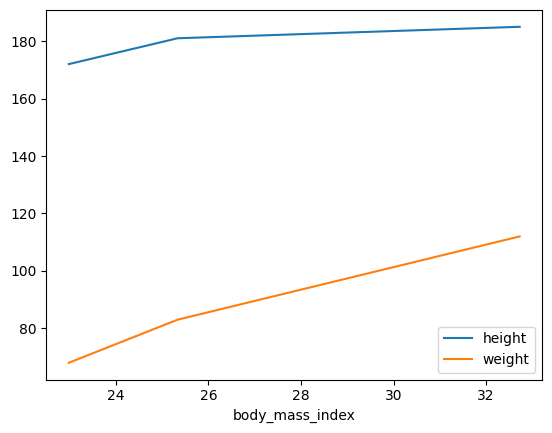

In [114]:
people.sort_values(by='body_mass_index', inplace=True)
people.plot(kind='line', x='body_mass_index', y=['height', 'weight'])
plt.show()

Additional arguments supported by matplotlib module functions can be passed. For example, a scatter plot can be created with passed a list of sizes using the `s` argument to the `scatter()` function.

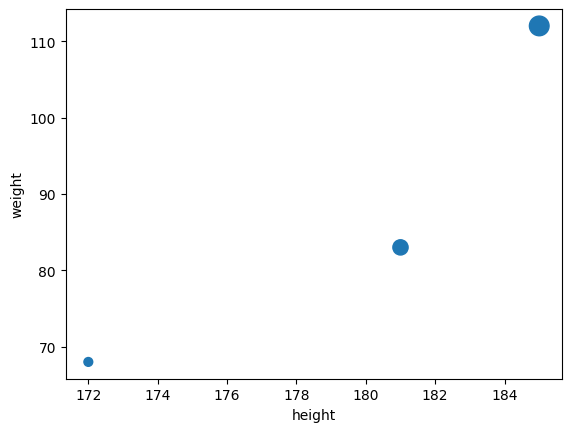

In [115]:
people.plot(kind='scatter', x='height', y='weight', s=[40, 120, 200])
plt.show()

## Operations on `DataFrame` objects

The `DataFrame` object does not try to imitate NumPy arrays, but some similarities between the two classes of objects can be found.

In [116]:
grades_array = np.array([[8, 8, 9], [10, 9, 9], [4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=['sep', 'oct', 'nov'], index=['alice', 'bob', 'carol', 'darwin'])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
carol,4,8,2
darwin,9,10,10


The mathematical functions of the NumPy module can be applied to the `DataFrame` object; such a function is applied to all values.

In [117]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
carol,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` object will add it to all elements of that object. This is called *broadcasting*.

In [118]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
carol,5,9,3
darwin,10,11,11


The same, applies to the remaining binary operations, both arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...):

In [119]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
carol,False,True,False
darwin,True,True,True


Aggregation operations, such as calculating the maximum (`max`), sum (`sum`), or average (`mean`) of a `DataFrame` object, are applied to each column, and a `Series` object as the result is obtained.

In [120]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregate operation: it checks if all all values are `True` or not.

In [121]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

In most of these functions an additional parameter `axis` can be added, which allows to specify the axis of the `DataFrame` object along which the operations are to be performed. By default, the axis is set to `axis=0`, which means that the operation will be performed vertically (across columns). Setting the value `axis=1` is needed to perform the operations horizontally (across rows).

In [122]:
(grades > 5).all(axis=1)

alice      True
bob        True
carol     False
darwin     True
dtype: bool

The `any` method returns `True` if any value is equal to 1 (`True`).

In [125]:
(grades == 10).any(axis=1)

alice     False
bob        True
carol     False
darwin     True
dtype: bool

If you a `Series` object will be added to a `DataFrame` object (or perform any other binary operation), pandas will try to broadcast the operation to all *rows* in the `DataFrame` object. This only works if the `Series` object is the same size as the rows of the `DataFrame` object. For example, subtraction the mean of the `DataFrame` object (the `Series` object) from the `DataFrame` object:

In [126]:
grades - grades.mean()  # equals to: grades - [7.75, 8.75, 7.50]

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
carol,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


`7.75` have been subtracted from all the grades received in September, `8.75` from the grades received in October and `7.50` from the grades received in November. This is equivalent to the following subtraction:

In [129]:
x = pd.DataFrame([[7.75, 8.75, 7.50]] * 4, index=grades.index, columns=grades.columns)
x

,sep,oct,nov
alice,7.75,8.75,7.5
bob,7.75,8.75,7.5
carol,7.75,8.75,7.5
darwin,7.75,8.75,7.5


In [130]:
grades - x

,sep,oct,nov
alice,0.25,-0.75,1.5
bob,2.25,0.25,1.5
carol,-3.75,-0.75,-5.5
darwin,1.25,1.25,2.5


If the global average has to be subtracted from each rating:

In [131]:
grades - grades.values.mean()

,sep,oct,nov
alice,0.0,0.0,1.0
bob,2.0,1.0,1.0
carol,-4.0,0.0,-6.0
darwin,1.0,2.0,2.0


## Automatic allocation

Similar to `Series` objects, when operating on multiple `DataFrame` objects, pandas automatically allocates them based on the row index label, but also the column names.

In [142]:
bonus_array = np.array([[0, np.nan, 2], [np.nan, 1, 0], [0, 1, 0], [3, 3, 0]])
bonus_points = pd.DataFrame(bonus_array, columns=['oct', 'nov', 'dec'], index=['bob', 'czeslaw', 'darwin', 'carol'])
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
czeslaw,NaN,1.0,0.0
darwin,0.0,1.0,0.0
carol,3.0,3.0,0.0


In [143]:
grades + bonus_points

,dec,nov,oct,sep
alice,NaN,NaN,NaN,NaN
bob,NaN,NaN,9.0,NaN
carol,NaN,5.0,11.0,NaN
czeslaw,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,NaN


It seems that adding worked in some cases, but now too many elements are empty. This is because when allocating `DataFrame` objects, some columns and rows were only available on one side, so they were considered missing (`NaN`) on the other side. Adding `NaN` to a number results in `NaN`, hence the result.

## Handling missing data
Pandas has several tools to handle it properly.

In [144]:
(grades + bonus_points).fillna(0)

,dec,nov,oct,sep
alice,0.0,0.0,0.0,0.0
bob,0.0,0.0,9.0,0.0
carol,0.0,5.0,11.0,0.0
czeslaw,0.0,0.0,0.0,0.0
darwin,0.0,11.0,10.0,0.0


It's a bit unfair though that zero grades in September are assigned. Maybe missing bonus points should be replaced by zeros.

In [151]:
fixed_bonus_points = bonus_points.fillna(0)
fixed_bonus_points.insert(0, 'sep', 0)
fixed_bonus_points.loc['alice'] = 0
grades + fixed_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,9.0,9.0,10.0
carol,NaN,5.0,11.0,4.0
czeslaw,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


Another way to deal with missing data is interpolation.

In [152]:
bonus_points

,oct,nov,dec
bob,0.0,NaN,2.0
czeslaw,NaN,1.0,0.0
darwin,0.0,1.0,0.0
carol,3.0,3.0,0.0


Call the `interpolate` method. By default, interpolation is done vertically (`axis=0`).

In [153]:
bonus_points.interpolate(axis=1)

,oct,nov,dec
bob,0.0,1.0,2.0
czeslaw,NaN,1.0,0.0
darwin,0.0,1.0,0.0
carol,3.0,3.0,0.0


Bob didn't get any extra points in October, but he did get two points in December. Interpolating for December gives an average value - one point. Czeslaw got one point in November, but unknown is how many points he got in September, so it's impossible to  interpolate, and that's why October is missing. This problem can be solved by inserting zero extra points in September just before interpolating.

In [154]:
better_bonus_points = bonus_points.copy()
better_bonus_points.insert(0, 'sep', 0)
better_bonus_points.loc['alice'] = 0
better_bonus_points = better_bonus_points.interpolate(axis=1)
better_bonus_points

,sep,oct,nov,dec
bob,0.0,0.0,1.0,2.0
czeslaw,0.0,0.5,1.0,0.0
darwin,0.0,0.0,1.0,0.0
carol,0.0,3.0,3.0,0.0
alice,0.0,0.0,0.0,0.0


In [155]:
grades + better_bonus_points

,dec,nov,oct,sep
alice,NaN,9.0,8.0,8.0
bob,NaN,10.0,9.0,10.0
carol,NaN,5.0,11.0,4.0
czeslaw,NaN,NaN,NaN,NaN
darwin,NaN,11.0,10.0,9.0


It's a bit annoying that the month columns are so mixed up. This is because the `DataFrame` objects which are added don't have exactly the same columns (the `grades` object is missing a `"dec"` column), so for predictability, pandas puts the final columns in alphabetical order.

In [156]:
grades['dec'] = np.nan
final_grades = grades + better_bonus_points
final_grades

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
carol,4.0,11.0,5.0,NaN
czeslaw,NaN,NaN,NaN,NaN
darwin,9.0,10.0,11.0,NaN


There's not much that can be done about Czeslaw and december: it's bad enough that there is need to come up with extra points, but it can't be done the same with grades. Calling the `dropna()` method will get rid of the rows filled with `NaN` values.

In [157]:
final_grades_clean = final_grades.dropna(how='all')
final_grades_clean

,sep,oct,nov,dec
alice,8.0,8.0,9.0,NaN
bob,10.0,9.0,10.0,NaN
carol,4.0,11.0,5.0,NaN
darwin,9.0,10.0,11.0,NaN


In [158]:
final_grades_clean = final_grades_clean.dropna(axis=1, how='all')
final_grades_clean

,sep,oct,nov
alice,8.0,8.0,9.0
bob,10.0,9.0,10.0
carol,4.0,11.0,5.0
darwin,9.0,10.0,11.0


## Aggregation with `groupby`

The pandas module, like SQL, allows to create groups of data on which individual calculations are performed.

First, additional information about each person will be inserted so it will be possible to group them.

In [159]:
final_grades['interests'] = ['bikes', 'dancing', np.nan, 'dancing', 'bikes']
final_grades

,sep,oct,nov,dec,interests
alice,8.0,8.0,9.0,NaN,bikes
bob,10.0,9.0,10.0,NaN,dancing
carol,4.0,11.0,5.0,NaN,NaN
czeslaw,NaN,NaN,NaN,NaN,dancing
darwin,9.0,10.0,11.0,NaN,bikes


The data in `DataFrame` grouped by interests.

In [160]:
grouped_grades = final_grades.groupby('interests')
grouped_grades

In [161]:
grouped_grades.mean()

,sep,oct,nov,dec
interests,,,,
bikes,8.5,9.0,10.0,NaN
dancing,10.0,9.0,10.0,NaN


## Pivot tables

The pandas module supports spreadsheet-style pivot tables for quickly displaying summary data.

In [174]:
more_grades = final_grades_clean.stack().reset_index()
more_grades.columns = ['name', 'month', 'grade']
more_grades['additional points'] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]
more_grades

,name,month,grade,additional points
0,alice,sep,8.0,NaN
1,alice,oct,8.0,NaN
2,alice,nov,9.0,NaN
3,bob,sep,10.0,0.0
4,bob,oct,9.0,NaN
5,bob,nov,10.0,2.0
6,carol,sep,4.0,3.0
7,carol,oct,11.0,3.0
8,carol,nov,5.0,0.0
9,darwin,sep,9.0,0.0


The `pd.pivot_table()` function can now be called on this `DataFrame` object and group the data by the `name` column. By default, the `pivot_table()` function calculates the average.

In [183]:
pd.pivot_table(more_grades, index='name', values=['grade', 'additional points'])

,additional points,grade
name,,
alice,NaN,8.333333
bob,1.000000,9.666667
carol,2.000000,6.666667
darwin,0.333333,10.000000


The aggregation function can be changed by specifying the `aggfunc` argument.

In [185]:
pd.pivot_table(more_grades, index='name', values=['grade', 'additional points'], aggfunc='max')

,additional points,grade
name,,
alice,NaN,9.0
bob,2.0,10.0
carol,3.0,11.0
darwin,1.0,11.0


In [188]:
pd.pivot_table(more_grades, index='name', values='grade', columns='month', margins=True)

month,nov,oct,sep,All
name,,,,
alice,9.00,8.0,8.00,8.333333
bob,10.00,9.0,10.00,9.666667
carol,5.00,11.0,4.00,6.666667
darwin,11.00,10.0,9.00,10.000000
All,8.75,9.5,7.75,8.666667


In [189]:
pd.pivot_table(more_grades, index=('name', 'month'), margins=True)

additional points  grade
name   month                          
alice  nov                  NaN   9.00
       oct                  NaN   8.00
       sep                  NaN   8.00
bob    nov                2.000  10.00
       oct                  NaN   9.00
       sep                0.000  10.00
carol  nov                0.000   5.00
       oct                3.000  11.00
       sep                3.000   4.00
darwin nov                0.000  11.00
       oct                1.000  10.00
       sep                0.000   9.00
All                       1.125   8.75

## Overview Functions

When using large `DataFrames`, it is sometimes useful to be able to quickly review their contents. The pandas module provides several functions for this.

In [190]:
much_data = np.fromfunction(lambda x, y: (x + y * y) % 17 * 11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,'any_tekst', 'Blabla')
large_df

,A,B,C,any_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,33.0,Blabla,88.0,165.0,77.0,11.0,154.0,132.0,...,NaN,NaN,NaN,33.0,88.0,165.0,77.0,11.0,154.0,132.0
9996,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
9997,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0


The `head()` method returns the first five lines.

In [191]:
large_df.head()

,A,B,C,any_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


There is also a `tail()` function that lets look through the last five rows. Any number of rows can be defined.

In [192]:
large_df.tail(n=2)

,A,B,C,any_tekst,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


The `info()` method displays a summary of the contents of each column.

In [193]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          8823 non-null   float64
 1   B          8824 non-null   float64
 2   C          8824 non-null   float64
 3   any_tekst  10000 non-null  object 
 4   D          8824 non-null   float64
 5   E          8822 non-null   float64
 6   F          8824 non-null   float64
 7   G          8824 non-null   float64
 8   H          8822 non-null   float64
 9   I          8823 non-null   float64
 10  J          8823 non-null   float64
 11  K          8822 non-null   float64
 12  L          8824 non-null   float64
 13  M          8824 non-null   float64
 14  N          8822 non-null   float64
 15  O          8824 non-null   float64
 16  P          8824 non-null   float64
 17  Q          8824 non-null   float64
 18  R          8823 non-null   float64
 19  S          8824 non-null   float64
 20  T      

There is also a `describe()` method that elegantly summarizes the main groups of values in each column:
* `count`: the number of non-zero values (not `NaN` values),
* `mean`: the average of non-zero values,
* `std`: standard deviation of non-zero values,
* `min`: the minimum values,
* `25%`, `50%`, `75%`: the 25th, 50th and 75th percentileof non-zero values
* `max`: the maximum values.

In [194]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Saving and Loading

The pandas module can save `DataFrame` objects in various forms, including file formats such as CSV, Excel, JSON, HTML, and HDF5, as well as to a SQL database.

In [195]:
my_df = pd.DataFrame(
    [['Bikes', 68.5, 1985, np.nan], ['Dancing', 83.1, 1984, 3]], 
    columns=['interests','weight','birth date','kids'],
    index=['alice', 'bob']
)
my_df

,interests,weight,birth date,kids
alice,Bikes,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Saving

Saving this object in CSV, HTML and JSON formats:

In [196]:
my_df.to_csv('object_df.csv')
my_df.to_html('object_df.html')
my_df.to_json('object_df.json')

In [197]:
for filename in ('object_df.csv', 'object_df.html', 'object_df.json'):
    print('#', filename)
    with open(filename, 'rt') as f:
        print(f.read())
        print()

# object_df.csv
,interests,weight,birth date,kids
alice,Bikes,68.5,1985,
bob,Dancing,83.1,1984,3.0


# object_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>interests</th>
      <th>weight</th>
      <th>birth date</th>
      <th>kids</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Bikes</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# object_df.json
{"interests":{"alice":"Bikes","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birth date":{"alice":1985,"bob":1984},"kids":{"alice":null,"bob":3.0}}


Index is preserved in the CSV file as the first (unnamed) column, the `<th>` tags in the HTML file, and as keys in the JSON format.

Saving a `<DataFrame>` object in other formats is very similar, but some require additional libraries to be installed.

In [198]:
try:
    my_df.to_excel('object_df.xlsx', sheet_name='People')
except ImportError as e:
    print(e)

No module named 'openpyxl'


## Loading

In [199]:
my_df_loaded = pd.read_csv('object_df.csv', index_col=0)
my_df_loaded

,interests,weight,birth date,kids
alice,Bikes,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


There are similar functions available: `read_json`, `read_html`, `read_excel`. Reading data directly from the Internet is also possible.

In [200]:
us_cities = None

try:
    csv_url = "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
    us_cities = pd.read_csv(csv_url, index_col=0)
    us_cities = us_cities.head()
except IOError as e:
    print(e)
    
us_cities

,State,Population,lat,lon
City,,,,
Marysville,Washington,63269,48.051764,-122.177082
Perris,California,72326,33.782519,-117.228648
Cleveland,Ohio,390113,41.499320,-81.694361
Worcester,Massachusetts,182544,42.262593,-71.802293
Columbia,South Carolina,133358,34.000710,-81.034814


# Joining `DataFrame` objects

## Joining in SQL style

One of the most powerful capabilities of the pandas module is its ability to perform SQL-like joins on `DataFrame` objects. There are different types of joins available: inner, left/right outer, and full.

In [202]:
city_loc = pd.DataFrame(
    [
        ['CA', 'San Francisco', 37.781334, -122.416728],
        ['NY', 'New York', 40.705649, -74.008344],
        ['FL', 'Miami', 25.791100, -80.320733],
        ['OH', 'Cleveland', 41.473508, -81.739791],
        ['UT', 'Salt Lake City', 40.755851, -111.896657]
    ], columns=['state', 'city', 'latitude', 'longitude'])
city_loc

,state,city,latitude,longitude
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [203]:
city_pop = pd.DataFrame(
    [
        [808976, 'San Francisco', 'California'],
        [8363710, 'New York', 'New York'],
        [413201, 'Miami', 'Florida'],
        [2242193, 'Houston', 'Texas']
    ], index=[3, 4, 5, 6], columns=['population', 'city', 'state'])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Combining these `DataFrame` objects using the `merge()` function:

In [204]:
pd.merge(left=city_loc, right=city_pop, on='city')

,state_x,city,latitude,longitude,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Both `DataFrame` objects contain a `state` column, so they are effectively renamed `state_x` and `state_y`.

The cities Cleveland, Salt Lake City, and Houston are omitted because they are not in *both* `DataFrame` objects. This is equivalent to an SQL `INNER JOIN`. To use a `FULL OUTER JOIN`, which ensures that no city is omitted and that `NaN` valuesare added, there must be specified the `how="outer"` attribute:

In [205]:
all_cities = pd.merge(left=city_loc, right=city_pop, on='city', how='outer')
all_cities

,state_x,city,latitude,longitude,population,state_y
0,OH,Cleveland,41.473508,-81.739791,NaN,NaN
1,NaN,Houston,NaN,NaN,2242193.0,Texas
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,NY,New York,40.705649,-74.008344,8363710.0,New York
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,CA,San Francisco,37.781334,-122.416728,808976.0,California


Using the `how="left"` attribute there is possibility to specify `LEFT OUTER JOIN`: as a result, only cities present in the first `DataFrame` object will be displayed. By analogy, thanks to the `how="right"` attribute, only cities from the right `DataFrame` object will be taken into account.

In [206]:
pd.merge(left=city_loc, right=city_pop, on='city', how='right')

,state_x,city,latitude,longitude,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


If the key used to perform the join is actually an index of one (or both) `DataFrame` objects, there is need to use the `left_index=True` and/or `right_index=True` attributes. If the column names are not the same, there is need to use the `left_on` and `right_on` attributes.

In [207]:
city_pop2 = city_pop.copy()
city_pop2.columns = ['population', 'name', 'state']
pd.merge(left=city_loc, right=city_pop2, left_on='city', right_on='name')

,state_x,city,latitude,longitude,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation

Instead of combining `DataFrame` objects, there is possibility to concatenate them. 

In [208]:
result_concat = pd.concat([city_loc, city_pop])
result_concat

,state,city,latitude,longitude,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


This operation linked the data horizontally (by columns) but not vertically (by rows). In this example, it end up with multiple rows having the same index (i.e. 3).

In [209]:
result_concat.loc[3]

,state,city,latitude,longitude,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


Alternatively, the index can be ignored.

In [210]:
pd.concat([city_loc, city_pop], ignore_index=True)

,state,city,latitude,longitude,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


If a given column does not exist in the `DataFrame` object, it behaves as if it were filled with `NaN` values. If the `join="inner"` attribute will be specified, only columns that exist in *both* `DataFrame` objects will be returned.

In [211]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New York,New York
5,Florida,Miami
6,Texas,Houston


To perform horizontal concatenation set the attribute `axis=1`.

In [212]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,latitude,longitude,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In this case, this operation doesn't make sense at all, because the indices don't match very well (i.e., the cities Cleveland and San Francisco are on the same row, because they have index label `3`).

In [213]:
pd.concat([city_loc.set_index('city'), city_pop.set_index('city')], axis=1)

,state,latitude,longitude,population,state
city,,,,,
San Francisco,CA,37.781334,-122.416728,808976.0,California
New York,NY,40.705649,-74.008344,8363710.0,New York
Miami,FL,25.791100,-80.320733,413201.0,Florida
Cleveland,OH,41.473508,-81.739791,NaN,NaN
Salt Lake City,UT,40.755851,-111.896657,NaN,NaN
Houston,NaN,NaN,NaN,2242193.0,Texas


This process is very similar to the `FULL OUTER JOIN` statement, except that the `state` columns were not renamed to `state_x` and `state_y`, and the `city` column became the index.

# Categories

Values representing categories, e.g. `1` - female and `2` - male, or `"A"` - good, `"B"` - average, `"C"` - bad are used quite often. These categorical values can be hard to read and tedious to process.

In [214]:
city_eco = city_pop.copy()
city_eco['eco_code'] = [17, 17, 34, 20]
city_eco

,population,city,state,eco_code
3,808976,San Francisco,California,17
4,8363710,New York,New York,17
5,413201,Miami,Florida,34
6,2242193,Houston,Texas,20


Currently, the `eco_code` column contains numerical values that are hard to understand.

In [215]:
city_eco['economy'] = city_eco['eco_code'].astype('category')
city_eco['economy'].cat.categories

Index([17, 20, 34], dtype='int64')

Now each category can has some meaningful name.

In [221]:
city_eco['economy'] = city_eco['economy'].cat.rename_categories(['Finance', 'Energy', 'Tourism'])
city_eco

,population,city,state,eco_code,economy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New York,17,Finance
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy


Categorical values have been sorted in categorical order, not *not* alphabetical order.

In [222]:
city_eco.sort_values(by='economy', ascending=False)

,population,city,state,eco_code,economy
5,413201,Miami,Florida,34,Tourism
6,2242193,Houston,Texas,20,Energy
3,808976,San Francisco,California,17,Finance
4,8363710,New York,New York,17,Finance
